In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from joblib import dump, load
import statistics as st

import cartopy.crs as ccrs
import matplotlib.ticker as ticker
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [2]:
obs = load('../../Feb2021/Final_Models/Teleconnections/TSdataObs.joblib') 
y=obs[((obs.time.dt.month>11) | (obs.time.dt.month<2)) & 
             (obs.time.dt.year<2020)].sel(time=slice('1980-12-1','2018-1-31'))

In [3]:
z500Data = xr.open_dataset('../../../Data/eraDown/ERA5_2degree_Down/DailyMean/ERA5NH_500_z_daily_NovDecJan.nc')
zTS=z500Data.z

In [95]:
z=zTS[((zTS.time.dt.month>11) | (zTS.time.dt.month<2)) & (zTS.time.dt.year<2020)].sel(time=slice('1980-12-1','2018-1-31'))

In [124]:
#zW=z.resample(time="QS-DEC").mean()
#yW=y[y>=0.48].resample(time="QS-DEC").count()

zW=z.resample(time="1M").mean()
yW=y.resample(time="1M").mean()

In [125]:
yW

<xarray.DataArray 'fogdata' (time: 446)>
array([0.14709677, 0.16903226,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan, 0.07483871, 0.16774194,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan, 0.07870968,
       0.31612903,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan, 0.07225806, 0.17032258,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan, 0.08516129, 0.17548387,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
       0.1316129 , 0.20903226,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan, 0.13032258, 0.28645161,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan, 0.26451613,
       0.21806452,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan, 0.13677419, 0.10967742,        nan,        nan,
...
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
       0.17806452, 0.37935484,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan, 0.56129032, 0.33290323,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan, 0.35483871,
       0.44387097,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan, 0.30322581, 0.51096774,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan, 0.49677419, 0.45677419,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
       0.34580645, 0.45032258,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan, 0.60516129, 0.43096774,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan, 0.32387097,
       0.55096774])
Coordinates:
  * time     (time) datetime64[ns] 1980-12-31 1981-01-31 ... 2018-01-31

In [126]:
#zDJ=zW[(zW.time.dt.month==12) | (zW.time.dt.month==1)  ] 
#yDJ=yW[(yW.time.dt.month==12) | (yW.time.dt.month==1) ]
zDJ=zW[zW.time.dt.month==12]
yDJ=yW[yW.time.dt.month==12]

In [127]:
#yDJ.where(yDJ.notnull(),0)
yDJ

<xarray.DataArray 'fogdata' (time: 38)>
array([0.14709677, 0.07483871, 0.07870968, 0.07225806, 0.08516129,
       0.1316129 , 0.13032258, 0.26451613, 0.13677419, 0.25677419,
       0.08774194, 0.23225806, 0.22580645, 0.16387097, 0.23741935,
       0.21419355, 0.2116129 , 0.41032258, 0.38709677, 0.31612903,
       0.21419355, 0.50451613, 0.28645161, 0.45548387, 0.44      ,
       0.25677419, 0.31870968, 0.25677419, 0.40645161, 0.16516129,
       0.17806452, 0.56129032, 0.35483871, 0.30322581, 0.49677419,
       0.34580645, 0.60516129, 0.32387097])
Coordinates:
  * time     (time) datetime64[ns] 1980-12-31 1981-12-31 ... 2017-12-31

In [128]:
CC=xr.corr(yDJ, zDJ, dim="time")

In [129]:
CC

<xarray.DataArray (latitude: 46, longitude: 180)>
array([[-0.18070018, -0.18070018, -0.18070018, ..., -0.18070018,
        -0.18070018, -0.18070018],
       [-0.17487605, -0.17429961, -0.1737162 , ..., -0.17665314,
        -0.1760479 , -0.17546163],
       [-0.15518532, -0.15390341, -0.15260186, ..., -0.15901005,
        -0.15774383, -0.15647158],
       ...,
       [ 0.41884613,  0.41422814,  0.41111385, ...,  0.43221485,
         0.42570621,  0.4217856 ],
       [ 0.41037254,  0.40526045,  0.40366203, ...,  0.41969315,
         0.41644458,  0.41064663],
       [ 0.40702496,  0.40267059,  0.39995143, ...,  0.41506957,
         0.41279824,  0.41037209]])
Coordinates:
  * longitude  (longitude) float32 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * latitude   (latitude) float32 90.0 88.0 86.0 84.0 82.0 ... 6.0 4.0 2.0 0.0

In [130]:
print(CC.where(CC==CC.max(), drop=True).squeeze())
print(CC.where(CC==CC.min(), drop=True).squeeze())

<xarray.DataArray ()>
array(0.57643307)
Coordinates:
    longitude  float32 74.0
    latitude   float32 20.0
<xarray.DataArray ()>
array(-0.31628562)
Coordinates:
    longitude  float32 206.0
    latitude   float32 62.0


In [131]:
def map_plot(ax1):
    ax1.coastlines()
    ax1.set_xticks([40,80,120,160,200,240,280,320,360 ], crs=ccrs.PlateCarree())
    ax1.set_yticks([0, 10, 20, 30, 40, 50, 60,70,80], crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax1.xaxis.set_major_formatter(lon_formatter)
    ax1.yaxis.set_major_formatter(lat_formatter)

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


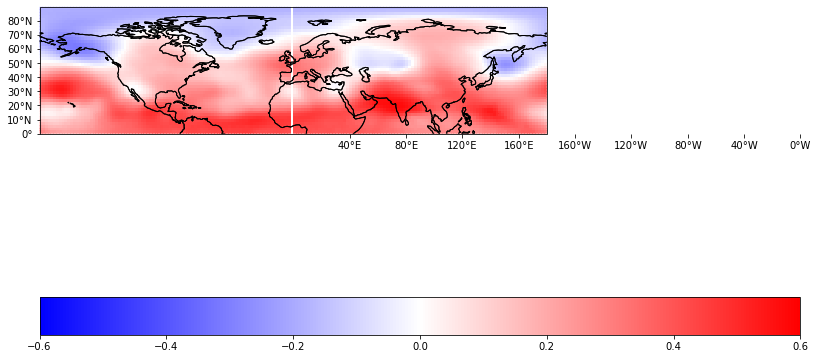

In [132]:
fig = plt.figure(figsize=(30,20))
ax1 = fig.add_subplot(121,projection=ccrs.PlateCarree())

m1=ax1.pcolor(CC.longitude.values,CC.latitude.values,CC,transform=ccrs.PlateCarree(),cmap='bwr',vmax=0.6,vmin=-.6)
#xr.plot.contour(zwideNeg.sel(latitude=slice(70,0),longitude=slice(20,150)).mean(dim='time'),figsize=[10,5],levels=np.linspace(-60,60,21 ),colors ='black',   transform=ccrs.PlateCarree())
map_plot(ax1)
ax1.coastlines()
# Recast levels to new class

#ax1.set_title(' GFDL All Widespread Fog Days Low Cloud %'+"    "+str(totalCnt) )
fig.colorbar(m1,orientation='horizontal')
#fig.colorbar(m1,orientation='horizontal')
#plt.savefig('../GFDLWDF_Cloud_All.jpeg',dpi=300)